### Realizar carga de dados no banco de dados MySQL

### 0.1 - Importar bibliotecas
###    1 - Coletar dados
###    2 - Criar EER no MySQL
###    3 - Criar conexão com banco de dados
###    4 - Criar estrutura de dados com apenas registros unicos
###    5 - Eliminar registros duplicados
###    6 - Inserir registros no banco de dados
###    7 - Criar tabela temporaria para fazer joins (stg)
###    8 - Inserir dados na tabela de pesquisa
###    9 - Fechar a conexão com o banco de dados

### 0.1 - Importar bibliotecas

In [1]:
import pandas as pd
import os
import MySQLdb
import sqlalchemy

###    1 - Coletar dados

In [2]:
DIRETORIO = 'C:/datasets'

In [3]:
lista_df = []
lista_path = os.listdir(DIRETORIO)

In [4]:
lista_path[:3]

['2020-01-01.csv', '2020-01-02.csv', '2020-01-03.csv']

In [20]:
lista_df = []
for arquivo in lista_path:
    local_arquivo = os.path.join(DIRETORIO, arquivo)
    df = pd.read_csv(local_arquivo, sep = '|', encoding='latin-1')
    lista_df.append(df)
df = pd.concat(lista_df)   

In [29]:
df[:10]

,cod_pessoa,data_coleta,genero,data_nascimento,animal_estimacao,clima,bebida_favorita,hobbies
0,10141743,2020-01-01,Masculino,1981-04-25,peixe,frio,Cerveja,Praticar esporte
1,10141860,2020-01-01,Feminino,1966-01-19,peixe,quente,Café,Assistir TV
2,10142548,2020-01-01,Masculino,1973-08-02,tartaruga,frio,Café,Ler livros
3,10142591,2020-01-01,Masculino,1997-03-05,gato,moderado,Cerveja,Aprender algo novo
4,10142654,2020-01-01,Feminino,1969-08-05,tartaruga,moderado,Café,Assistir TV
0,10141523,2020-01-02,Feminino,1998-09-24,gato,quente,Cerveja,Aprender algo novo
1,10141996,2020-01-02,Feminino,1973-03-13,tartaruga,quente,refrigerante,Escrever
2,10142089,2020-01-02,Feminino,1970-03-23,gato,moderado,Água,Pintar quadros
3,10142145,2020-01-02,Masculino,1998-08-01,peixe,frio,refrigerante,Escrever
4,10142520,2020-01-02,Masculino,1994-05-09,peixe,moderado,Café,Praticar esporte


In [22]:
lista_path = os.listdir(DIRETORIO)

In [23]:
lista_path[-1]

'2020-12-31.csv'

In [24]:
df.head()

,cod_pessoa,data_coleta,genero,data_nascimento,animal_estimacao,clima,bebida_favorita,hobbies
0,10141743,2020-01-01,Masculino,1981-04-25,peixe,frio,Cerveja,Praticar esporte
1,10141860,2020-01-01,Feminino,1966-01-19,peixe,quente,Café,Assistir TV
2,10142548,2020-01-01,Masculino,1973-08-02,tartaruga,frio,Café,Ler livros
3,10142591,2020-01-01,Masculino,1997-03-05,gato,moderado,Cerveja,Aprender algo novo
4,10142654,2020-01-01,Feminino,1969-08-05,tartaruga,moderado,Café,Assistir TV


###    2 - Criar EER no MySQL

In [1]:
from IPython.display import Image

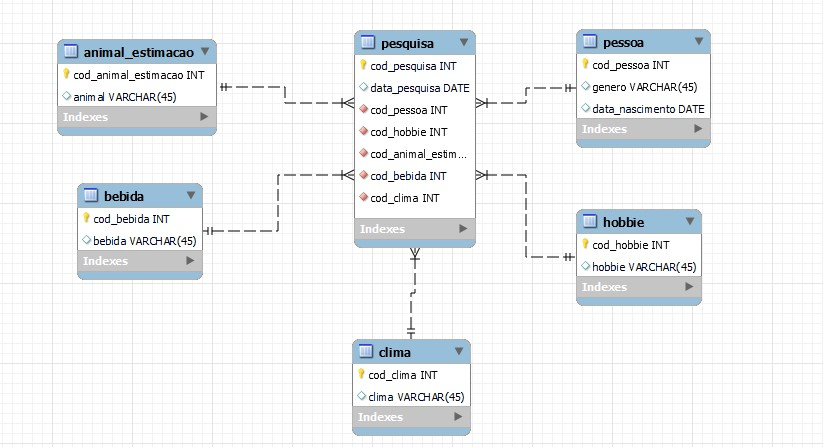

In [2]:
Image( 'C:/Mysql/diagrama.jpg' )

###    3 - Criar conexão com banco de dados

In [ ]:
user = 'root'
password = 'senha'
host = 'localhost'
database = 'pesquisa' #schema

string_conexao = f'mysql://{user}:{password}@{host}/{database}'
string_conexao  

In [13]:
engine = sqlalchemy.create_engine(string_conexao)
conn = engine.connect()

###    4 - Criar estrutura de dados com apenas registros unicos

In [36]:
df_pessoas = df[["cod_pessoa", "genero", "data_nascimento"]].drop_duplicates()
df_pessoas

,cod_pessoa,genero,data_nascimento
0,10141743,Masculino,1981-04-25
1,10141860,Feminino,1966-01-19
2,10142548,Masculino,1973-08-02
3,10142591,Masculino,1997-03-05
4,10142654,Feminino,1969-08-05
...,...,...,...
1,10142475,Masculino,1955-05-30
2,10142522,Masculino,1954-12-22
3,10142881,Masculino,1952-07-30
4,10143184,Masculino,1984-06-05


###    5 - Eliminar registros duplicados

In [26]:
animais = list(df.animal_estimacao.unique())
animais

['peixe', 'tartaruga', 'gato', 'cachorro']

In [27]:
climas = list(df['clima'].unique())
climas

['frio', 'quente', 'moderado']

In [28]:
bebidas = list(df.bebida_favorita.unique())
bebidas

['Cerveja', 'Café', 'refrigerante', 'Água', 'Vinho', 'Chá']

In [30]:
hobbies = list(df.hobbies.unique())
hobbies

['Praticar esporte',
 'Assistir TV',
 'Ler livros',
 'Aprender algo novo',
 'Escrever',
 'Pintar quadros',
 'Dormir',
 'Escutar música']

In [31]:
df.shape

(2127, 8)

###    6 - Inserir registros no banco de dados

In [37]:
for pessoa in df_pessoas[:3].itertuples():
    print(pessoa)

Pandas(Index=0, cod_pessoa=10141743, genero='Masculino', data_nascimento='1981-04-25')
Pandas(Index=1, cod_pessoa=10141860, genero='Feminino', data_nascimento='1966-01-19')
Pandas(Index=2, cod_pessoa=10142548, genero='Masculino', data_nascimento='1973-08-02')


In [33]:
from sqlalchemy import text

In [ ]:
for pessoa in df_pessoas.itertuples():
    cod_pessoa = pessoa.cod_pessoa
    genero = pessoa.genero
    data_nascimento = str(pessoa.data_nascimento)
    
    try:
        query = f"""insert into pessoa (cod_pessoa, genero, data_nascimento)
        values ('{cod_pessoa}', '{genero}', '{data_nascimento}')"""
        conn.execute(query)
        print(f"registro inserido com sucesso: {cod_pessoa}")
    except Exception as e:
        print(f"não foi possivel inserir {cod_pessoa}. o erro foi : {e}")

In [39]:
for animal in animais:  
    try:
        query = f"""insert into animal_estimacao (animal)
        values ('{animal}')"""
        conn.execute(query)
        print(f"registro inserido com sucesso: {animal}")
    except Exception as e:
        print(f"não foi possivel inserir {animal}. o erro foi : {e}")

registro inserido com sucesso: peixe
registro inserido com sucesso: tartaruga
registro inserido com sucesso: gato
registro inserido com sucesso: cachorro


In [40]:
for bebida in bebidas:  
    try:
        query = f"""insert into bebida (bebida)
        values ('{bebida}')"""
        conn.execute(query)
        print(f"registro inserido com sucesso: {bebida}")
    except Exception as e:
        print(f"não foi possivel inserir {bebida}. o erro foi : {e}")

registro inserido com sucesso: Cerveja
registro inserido com sucesso: Café
registro inserido com sucesso: refrigerante
registro inserido com sucesso: Água
registro inserido com sucesso: Vinho
registro inserido com sucesso: Chá


In [41]:
for hobbie in hobbies:  
    try:
        query = f"""insert into hobbie (hobbie)
        values ('{hobbie}')"""
        conn.execute(query)
        print(f"registro inserido com sucesso: {hobbie}")
    except Exception as e:
        print(f"não foi possivel inserir {hobbie}. o erro foi : {e}")

registro inserido com sucesso: Praticar esporte
registro inserido com sucesso: Assistir TV
registro inserido com sucesso: Ler livros
registro inserido com sucesso: Aprender algo novo
registro inserido com sucesso: Escrever
registro inserido com sucesso: Pintar quadros
registro inserido com sucesso: Dormir
registro inserido com sucesso: Escutar música


In [ ]:
for clima in climas:  
    try:
        query = f"""insert into clima (clima)
        values ('{clima}')"""
        conn.execute(query)
        print(f"registro inserido com sucesso: {clima}")
    except Exception as e:
        print(f"não foi possivel inserir {clima}. o erro foi : {e}")

###    7 - Criar tabela temporaria para fazer joins (stg)

In [42]:
df.to_sql('stg_pesquisa', con=conn, schema='pesquisa')

2127

###    8 - Inserir dados na tabela de pesquisa

In [ ]:
query = """
        insert into pesquisa (data_pesquisa,
        cod_pessoa,
        cod_animal_estimacao,
        cod_bebida,
        cod_hobbie,
        cod_clima)

        (select stg.data_coleta as data_pesquisa,
        stg.cod_pessoa,
        aes.cod_animal_estimacao,
        beb.cod_bebida,
        hob.cod_hobbie,
        cli.cod_clima
        from stg_pesquisa as stg
        join animal_estimacao aes on stg.animal_estimacao = aes.animal
        join bebida as beb on beb.bebida = stg.bebida_favorita
        join hobbie as hob on hob.hobbie = stg.hobbie
        join clima as cli on cli.clima = stg.clima
        
        
        );

"""
conn.execute(query)

In [ ]:
use pesquisa;

select stg.data_coleta as data_pesquisa,
        stg.cod_pessoa,
        aes.cod_animal_estimacao,
        beb.cod_bebida,
        hob.cod_hobbie
from stg_pesquisa as stg
        join animal_estimacao aes on stg.animal_estimacao = aes.animal
        join bebida as beb on beb.bebida = stg.bebida_favorita
        join hobbie as hob on hob.hobbie = stg.hobbies

###    9 - Fechar a conexão com o banco de dados

In [44]:
conn.close()